# Player evaluation

Here we compare players based on their adjusted points. Also, we calculate some useful metrics using the adjusted points to further evaluate player performance in FPL.

In [1]:
# recent gameweek
gameweek = 5

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import requests
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('max_columns',100)

In [3]:
# fetch FPL data
filepath = '../data/fpl/data_week' + str(gameweek) + '.csv'
df = pd.read_csv(filepath, index_col=0)

# fetch team data
filepath = '../data/fbref/team_stats_week' + str(gameweek) + '.csv'
teamStats = pd.read_csv(filepath, index_col=0)

# fetch player stats data
filepath = '../data/fbref/player_stats_week' + str(gameweek) + '.csv'
playerStats = pd.read_csv(filepath, index_col=0, skiprows=1)

## Value and value points

Here we calculate two interesting metrics: 'value' and 'value points'. 

Value is simply adjusted points per game divided by the cost of the player. Essentially, this measures how many 'points per pound(/euro/whatever)' has the player gained on an average game week. 

The value points is calculated as the geometric mean of a players adjusted points per game and value. Essentially, in FPL we want to gain the maximum possible amount of points. However, we are restrained by a limited budget, so that in practice we cannot just pick all the best players. Then, we would like to have a squad of players that give the most points given our budget. Thus, we would like to pick players that have high value ('bang for buck'). However, often the players with highest value are very cheap players who somewhat overperform relative to their price. Picking a squad full of these players might leave a part of our budget unused. Calculating the geometric mean of adjusted points and value allows us to weigh both aspects equally, i.e. we want players that both gain a lot of points but also have good value. For example, this metric values equally two players, where one has twice the points per game of the other who in turn has twice the value of the other.

In [4]:
# value = expected points / cost
df['value'] = df['adjusted points per game'] / (df['now_cost'] / 10.0)
df['value form 5'] = df['form 5'] / (df['now_cost'] / 10.0)
df['value form 10'] = df['form 10'] / (df['now_cost'] / 10.0)
# geometric mean of 'adjusted points per game' and 'value'
df['valuePoints metric'] = np.sqrt(df['adjusted points per game'] * df['value'])

In [5]:
df['value_next10']  = df['xPoints_next10'] / (df['now_cost'] / 10.0)

In [6]:
df['xG+xA'] = df['xG'] + df['xA']
df['xG+xA per game'] = df['xG+xA'] / df['games played']

In [7]:
goalkeepers = df['element_type'] == 1
defenders = df['element_type'] == 2
midfielders = df['element_type'] == 3
forwards = df['element_type'] == 4

minGames = df['games played'] >= 1

## Player evaluation

Below we compile lists for each position sorting players based on a given metric.

Notice that 'next1_xP' is currently based on preseason expectations on average player performance!

In [8]:
metric = 'valuePoints metric'
#metric = 'adjusted points per game'
#metric = 'next1_xP'

numberToShow = 40

print('GOALKEEPERS')
display(df[goalkeepers & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10', 'valuePoints metric']].head(20))
print('DEFENDERS')
display(df[defenders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10','valuePoints metric']].head(numberToShow))
print('MIDFIELDERS')
display(df[midfielders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10','valuePoints metric']].head(numberToShow))
print('FORWARDS')
display(df[forwards & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10','valuePoints metric']].head(numberToShow))

GOALKEEPERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
294,Darlow,Newcastle Utd,45,1.0,8,8.417402,8.0,8.417402,8.443213,32.011800,3.968001
270,de Gea,Manchester Utd,50,5.0,24,26.657422,4.8,5.331484,5.489537,45.034061,2.384312
80,Raya,Brentford,46,5.0,25,22.735045,5.0,4.547009,4.708856,41.809848,2.120054
376,Foster,Watford,40,1.0,3,4.090127,3.0,4.090127,4.471518,33.165514,2.045064
231,Alisson,Liverpool,60,5.0,33,24.211899,6.6,4.842380,4.897290,37.229654,1.976893
143,Mendy,Chelsea,60,4.0,26,19.325937,6.5,4.831484,5.271972,41.759680,1.972445
353,Lloris,Tottenham,56,5.0,31,23.179601,6.2,4.635920,4.808211,37.955328,1.959034
257,Ederson,Manchester City,60,5.0,28,23.654965,5.6,4.730993,4.961485,37.948826,1.931420
559,Ramsdale,Arsenal,45,2.0,15,8.104554,7.5,4.052277,5.095559,36.412361,1.910262


DEFENDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
237,Alexander-Arnold,Liverpool,76,4.0,34,32.911519,8.5,8.227880,8.250543,50.481091,2.984566
253,Mendy,Manchester City,53,1.0,3,6.230993,3.0,6.230993,4.990127,36.641879,2.706570
259,Laporte,Manchester City,56,3.0,25,18.492979,8.3,6.164326,6.845338,45.518750,2.604903
256,Cancelo,Manchester City,60,5.0,32,31.725965,6.4,6.345193,6.575685,42.584457,2.590414
262,Dias,Manchester City,61,5.0,34,31.325965,6.8,6.265193,6.495685,41.947562,2.536703
76,Jansson,Brentford,46,5.0,29,25.406045,5.8,5.081209,5.243056,39.698087,2.369126
91,Pinnock,Brentford,46,5.0,29,25.106045,5.8,5.021209,5.183056,39.466014,2.341151
224,Matip,Liverpool,50,4.0,20,20.369519,5.0,5.092380,5.115043,36.807110,2.277381
122,Alonso,Chelsea,57,5.0,38,27.028422,7.6,5.405684,5.889046,44.314309,2.264192


MIDFIELDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
233,Salah,Liverpool,126,5.0,50,41.935975,10.0,8.387195,8.496923,47.678480,2.362824
268,Torres,Manchester City,72,4.0,26,25.101993,6.5,6.275498,6.325634,41.110008,2.338740
144,Gallagher,Crystal Palace,56,4.0,28,21.695945,7.0,5.423986,5.556168,42.083148,2.292052
419,Benrahma,West Ham,64,5.0,39,28.006355,7.8,5.601271,5.629828,43.044064,2.214097
230,Mané,Liverpool,119,5.0,32,36.573975,6.4,7.314795,7.328523,43.290407,2.120453
399,Sarr,Watford,61,5.0,30,26.162659,6.0,5.232532,5.253157,39.629865,2.118590
96,Mbeumo,Brentford,55,5.0,17,24.733761,3.4,4.946752,4.987214,40.336900,2.109302
517,Elyounoussi,Southampton,55,3.0,14,14.339791,4.7,4.779930,4.909427,40.371222,2.038169
240,Jota,Liverpool,77,5.0,23,27.602975,4.6,5.520595,5.444457,48.410384,1.989484


FORWARDS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
177,Calvert-Lewin,Everton,81,3.0,23,25.540,7.7,8.513333,8.833333,57.773018,2.991280
413,Antonio,West Ham,79,4.0,39,28.004,9.8,7.001000,7.001000,56.761342,2.490844
579,Ronaldo,Manchester Utd,127,2.0,19,17.000,9.5,8.500000,3.400000,54.749139,2.385158
78,Toney,Brentford,63,5.0,24,24.991,4.8,4.998200,5.094200,46.731518,1.991331
529,Lukaku,Chelsea,116,4.0,25,26.200,6.2,6.550000,6.550000,59.560102,1.923146
189,Bamford,Leeds United,80,5.0,21,26.342,4.2,5.268400,5.268400,42.928177,1.862661
296,Wilson,Newcastle Utd,74,3.0,16,15.200,5.3,5.066667,5.066667,44.117237,1.862544
583,Hwang,Wolves,55,2.0,9,8.600,4.5,4.300000,0.700000,38.475023,1.833526
263,Jesus,Manchester City,86,5.0,28,26.413,5.6,5.282600,5.282600,39.895028,1.801352


Below we compile a list sorting players based on a given metric (irrespective of position).

In [9]:
metric = 'adjusted points per game'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','xPoints_next10',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,xPoints_next10,valuePoints metric
id,,,,,,,,,,
177,Calvert-Lewin,Everton,81,3.0,23,25.540000,7.7,8.513333,57.773018,2.991280
579,Ronaldo,Manchester Utd,127,2.0,19,17.000000,9.5,8.500000,54.749139,2.385158
294,Darlow,Newcastle Utd,45,1.0,8,8.417402,8.0,8.417402,32.011800,3.968001
233,Salah,Liverpool,126,5.0,50,41.935975,10.0,8.387195,47.678480,2.362824
237,Alexander-Arnold,Liverpool,76,4.0,34,32.911519,8.5,8.227880,50.481091,2.984566
230,Mané,Liverpool,119,5.0,32,36.573975,6.4,7.314795,43.290407,2.120453
413,Antonio,West Ham,79,4.0,39,28.004000,9.8,7.001000,56.761342,2.490844
529,Lukaku,Chelsea,116,4.0,25,26.200000,6.2,6.550000,59.560102,1.923146
256,Cancelo,Manchester City,60,5.0,32,31.725965,6.4,6.345193,42.584457,2.590414


In [10]:
metric = 'valuePoints metric'

display(df[minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','xPoints_next10',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,
294,Darlow,Newcastle Utd,45,1.0,8.0,8.417402,8.443213,32.011800,3.968001
177,Calvert-Lewin,Everton,81,3.0,7.7,8.513333,8.833333,57.773018,2.991280
237,Alexander-Arnold,Liverpool,76,4.0,8.5,8.227880,8.250543,50.481091,2.984566
253,Mendy,Manchester City,53,1.0,3.0,6.230993,4.990127,36.641879,2.706570
259,Laporte,Manchester City,56,3.0,8.3,6.164326,6.845338,45.518750,2.604903
256,Cancelo,Manchester City,60,5.0,6.4,6.345193,6.575685,42.584457,2.590414
262,Dias,Manchester City,61,5.0,6.8,6.265193,6.495685,41.947562,2.536703
413,Antonio,West Ham,79,4.0,9.8,7.001000,7.001000,56.761342,2.490844
579,Ronaldo,Manchester Utd,127,2.0,9.5,8.500000,3.400000,54.749139,2.385158


In [11]:
metric = 'form 10'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 10',\
                                                        'xPoints_next10','valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 10,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
177,Calvert-Lewin,Everton,81,3.0,23,25.540000,7.7,8.513333,8.833333,57.773018,2.991280
233,Salah,Liverpool,126,5.0,50,41.935975,10.0,8.387195,8.496923,47.678480,2.362824
294,Darlow,Newcastle Utd,45,1.0,8,8.417402,8.0,8.417402,8.443213,32.011800,3.968001
237,Alexander-Arnold,Liverpool,76,4.0,34,32.911519,8.5,8.227880,8.250543,50.481091,2.984566
230,Mané,Liverpool,119,5.0,32,36.573975,6.4,7.314795,7.328523,43.290407,2.120453
413,Antonio,West Ham,79,4.0,39,28.004000,9.8,7.001000,7.001000,56.761342,2.490844
259,Laporte,Manchester City,56,3.0,25,18.492979,8.3,6.164326,6.845338,45.518750,2.604903
256,Cancelo,Manchester City,60,5.0,32,31.725965,6.4,6.345193,6.575685,42.584457,2.590414
529,Lukaku,Chelsea,116,4.0,25,26.200000,6.2,6.550000,6.550000,59.560102,1.923146


In [13]:
metric = f'gameweek {gameweek+1} prediction'
#metric = f'xPoints_next10'

display(df[forwards].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game',metric,\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,gameweek 6 prediction,valuePoints metric
id,,,,,,,,,,
177,Calvert-Lewin,Everton,81,3.0,23,25.540,7.7,8.513333,6.853114,2.991280
413,Antonio,West Ham,79,4.0,39,28.004,9.8,7.001000,6.420408,2.490844
579,Ronaldo,Manchester Utd,127,2.0,19,17.000,9.5,8.500000,5.098462,2.385158
529,Lukaku,Chelsea,116,4.0,25,26.200,6.2,6.550000,4.845487,1.923146
180,Richarlison,Everton,75,4.0,16,15.971,4.0,3.992750,4.814730,1.457946
205,Vardy,Leicester City,104,5.0,29,23.671,5.8,4.734200,4.571732,1.468013
109,Wood,Burnley,69,5.0,17,20.500,3.4,4.100000,4.526552,1.560843
450,Dennis,Watford,52,5.0,22,17.071,4.4,3.414200,4.334762,1.497226
4,Aubameyang,Arsenal,99,4.0,13,16.100,3.2,4.025000,4.292720,1.279229


In [14]:
metric = 'xG'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game',\
                      'valuePoints metric', 'xG', 'xA', 'xG+xA', 'xG+xA per game']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,valuePoints metric,xG,xA,xG+xA,xG+xA per game
id,,,,,,,,,,,
230,Mané,Liverpool,119,5.0,6.4,7.314795,2.120453,4.5,0.5,5.0,1.000000
177,Calvert-Lewin,Everton,81,3.0,7.7,8.513333,2.991280,3.8,0.1,3.9,1.300000
233,Salah,Liverpool,126,5.0,10.0,8.387195,2.362824,3.0,2.1,5.1,1.020000
189,Bamford,Leeds United,80,5.0,4.2,5.268400,1.862661,3.0,0.6,3.6,0.720000
413,Antonio,West Ham,79,4.0,9.8,7.001000,2.490844,2.7,1.2,3.9,0.975000
579,Ronaldo,Manchester Utd,127,2.0,9.5,8.500000,2.385158,2.5,0.0,2.5,1.250000
529,Lukaku,Chelsea,116,4.0,6.2,6.550000,1.923146,2.4,1.2,3.6,0.900000
240,Jota,Liverpool,77,5.0,4.6,5.520595,1.989484,2.4,1.6,4.0,0.800000
268,Torres,Manchester City,72,4.0,6.5,6.275498,2.338740,2.4,0.0,2.4,0.600000


## Player Visualizations

In [15]:
game_weeks = np.arange(1,gameweek+1)
column_xPoints = []
column_xG = []
column_xA = []
column_xGA = []
for i in range(1,gameweek+1):
    column_xPoints.append('xPoints week ' + str(i))
    column_xG.append('xG_week' + str(i))
    column_xA.append('xA_week' + str(i))
    column_xGA.append('xGA_week' + str(i))

#display(game_weeks)
#display(column_xPoints)

,adjusted points,adjusted points per game,assists,assists_week1,assists_week2,assists_week3,assists_week4,assists_week5,bonus,bonus_week1,bonus_week2,bonus_week3,bonus_week4,bonus_week5,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheet_points,clean_sheets,cleansheet_week1,cleansheet_week2,cleansheet_week3,cleansheet_week4,cleansheet_week5,code,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,creativity,creativity_rank,creativity_rank_type,direct_freekicks_order,direct_freekicks_text,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,form 10,form 15,form 20,form 5,games played,gameweek,gameweek 10 prediction,...,status,team,team_code,team_name,threat,threat_rank,threat_rank_type,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value,value form 10,value form 5,valuePoints metric,value_form,value_next10,value_season,web_name,xA,xA_points,xA_week1,xA_week2,xA_week3,xA_week4,xA_week5,xG,xG+xA,xG+xA per game,xGA_week1,xGA_week2,xGA_week3,xGA_week4,xGA_week5,xG_points,xG_week1,xG_week2,xG_week3,xG_week4,xG_week5,xPoints,xPoints week 1,xPoints week 2,xPoints week 3,xPoints week 4,xPoints week 5,xPoints_next10,yellow_cards,gameweek 15 prediction
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
240,27.602975,5.520595,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,70,NaN,NaN,1.802975,4,1.0,1.0,0.0,1.0,1.0,194634,NaN,NaN,0,0,2,-2,109.1,34,24,NaN,NaN,0,3,3.3,2.8,3,Diogo,2.3,5.444457,5.444457,5.444457,5.444457,5.0,5,4.811736,...,a,11,14,Liverpool,217.0,8,4,23,1417992,32182,728611,79234,0.71696,0.707072,0.707072,1.989484,0.3,6.287063,3.0,Jota,1.6,4.8,0.0,0.1,0.0,1.5,0.0,2.4,4.0,0.8,1.4,0.7,0.8,1.3,0.9,12.0,0.7,0.2,0.3,0.2,1.0,7.40657,5.746597,3.796585,2.5,7.772532,7.40657,48.410384,0,4.583484


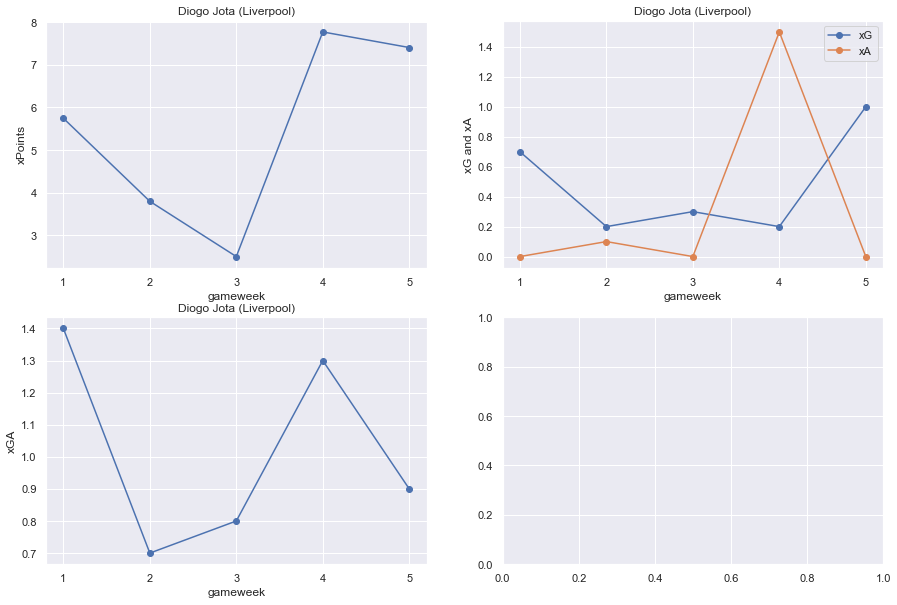

In [16]:
# find player index
name_string = 'Jota'
playersFound = df[df['web_name'].str.contains(name_string)]
display(playersFound)
# plot xPoints over time
ix = playersFound.index[0]
#ix = 468

fig,ax = plt.subplots(2,2,figsize=(15,10))

ax[0,0].plot(game_weeks, df.loc[ix,column_xPoints], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,0].set_title(title_string)
ax[0,0].set_xlabel('gameweek')
ax[0,0].set_ylabel('xPoints')
ax[0,0].set_xticks(game_weeks)

ax[0,1].plot(game_weeks, df.loc[ix,column_xG], marker='o')
ax[0,1].plot(game_weeks, df.loc[ix,column_xA], marker='o')
ax[0,1].legend(('xG','xA'))
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,1].set_title(title_string)
ax[0,1].set_xlabel('gameweek')
ax[0,1].set_ylabel('xG and xA')
ax[0,1].set_xticks(game_weeks)

ax[1,0].plot(game_weeks, df.loc[ix,column_xGA], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[1,0].set_title(title_string)
ax[1,0].set_xlabel('gameweek')
ax[1,0].set_ylabel('xGA')
ax[1,0].set_xticks(game_weeks)

plt.show()

## My team

In [17]:
session = requests.session()

In [18]:
filepath = Path('../../../access_control/FPL_access.txt')
with open(filepath) as file:
    text = file.read().splitlines()
    email = text[0]
    password = text[1]

In [19]:
url = 'https://users.premierleague.com/accounts/login/'

payload = {
'password': password,
'login': email,
'redirect_uri': 'https://fantasy.premierleague.com/a/login', 'app': 'plfpl-web'
}
session.post(url, data=payload)

<Response [200]>

In [20]:
response = session.get('https://fantasy.premierleague.com/api/my-team/3202682')
team = response.json()['picks']

In [21]:
my_player_ix = [player['element'] for player in team]
my_starting11 = my_player_ix[:-4]
my_subs = my_player_ix[-4:]

In [22]:
exp_avg = df.loc[my_starting11,'adjusted points per game'].sum() + \
                df.loc[my_starting11,'adjusted points per game'].max()
exp_next = df.loc[my_starting11, f'gameweek {gameweek+1} prediction'].sum() + \
                df.loc[my_starting11,f'gameweek {gameweek+1} prediction'].max()

print('STARTING 11')
print('Expected points on average: ' + str(exp_avg))
print('Predicted points next gameweek: ' + str(exp_next))
display(df.loc[my_starting11, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10', \
           f'gameweek {gameweek+1} prediction','xPoints_next10', 'valuePoints metric']].head(numberToShow))
print('\nSUBSTITUTES')
display(df.loc[my_subs, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10', \
         f'gameweek {gameweek+1} prediction', 'xPoints_next10', 'valuePoints metric']].head(numberToShow))

STARTING 11
Expected points on average: 63.2929630127728
Predicted points next gameweek: 52.11006832122803


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,gameweek 6 prediction,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
69,Sánchez,Brighton,45,5.0,3.4,3.124777,3.236785,3.236785,3.858673,38.320326,1.473034
275,Shaw,Manchester Utd,55,5.0,3.6,4.285684,4.443737,4.443737,3.942344,38.070584,1.827422
237,Alexander-Arnold,Liverpool,76,4.0,8.5,8.227880,8.250543,8.250543,4.826486,50.481091,2.984566
67,White,Arsenal,44,3.0,4.3,2.318944,3.193748,3.193748,3.610201,32.646118,1.105513
277,Fernandes,Manchester Utd,119,5.0,6.6,4.832871,4.872384,4.872384,4.211545,43.044153,1.400979
233,Salah,Liverpool,126,5.0,10.0,8.387195,8.496923,8.496923,4.038250,47.678480,2.362824
33,Grealish,Manchester City,80,5.0,4.2,4.696948,4.754571,4.754571,3.660097,39.337840,1.660622
21,Smith Rowe,Arsenal,53,5.0,2.0,3.138069,3.130224,3.130224,3.679295,33.480067,1.363090
413,Antonio,West Ham,79,4.0,9.8,7.001000,7.001000,7.001000,6.420408,56.761342,2.490844



SUBSTITUTES


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,gameweek 6 prediction,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
376,Foster,Watford,40,1.0,3.0,4.090127,4.471518,4.471518,3.798877,33.165514,2.045064
361,Dier,Tottenham,46,5.0,4.4,2.955920,3.055637,3.055637,3.694284,31.041954,1.378205
302,Manquillo,Newcastle Utd,40,2.0,4.5,3.117402,3.143213,3.143213,3.547597,37.017876,1.558701
115,Brownhill,Burnley,45,5.0,1.4,1.953980,1.989567,1.989567,2.576816,23.208391,0.921115


## Save data

In [23]:
# save data
filepath = '../data/fpl/data_week' + str(gameweek) + str('.csv')
df.to_csv(filepath)